In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten
from keras.layers.core import Lambda
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

C:\Users\Max\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [60]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
train_in = np.array(np.where(y_train != 0))[0]
# print(train_in.shape)
# print(train_in[0:20])
# print(np.unique(train_in[1]))
# train_out = np.where(y_train == 0)
test_in = np.array(np.where(y_test != 0))[0]
test_out = np.array(np.where(y_test == 0))[0]
# print('1:', x_train[np.where(y_train != 0)].shape)
# print('2:', x_train[0:2].shape)
x_train_in = x_train[np.array(train_in)]
# print(x_train_in.shape)
y_train_in = y_train[train_in]
x_test_in = x_test[test_in]
y_test_in = y_test[test_in]
x_test_ood = x_test[test_out]
y_test_ood = y_test[test_out]

y_train_in = to_categorical(y_train_in, num_classes=10)
y_test_in = to_categorical(y_test_in, num_classes=10)
y_test_ood = to_categorical(y_test_ood, num_classes=10)

x_train_in = x_train_in.astype('float32')
x_test_in = x_test_in.astype('float32')
x_test_ood = x_test_ood.astype('float32')
x_train_in /= 255
x_test_in /= 255
x_test_ood /= 255


print(x_train_in.shape, y_train_in.shape)
print(x_test_in.shape, y_test_in.shape)
print(x_test_ood.shape, y_test_ood.shape)

(50000, 32, 32, 3)
(45000, 32, 32, 3) (45000, 10)
(9000, 32, 32, 3) (9000, 10)
(1000, 32, 32, 3) (1000, 10)


In [38]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), padding='same',
#                  input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

In [61]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation

#create model
model = Sequential()

#add model layers
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# model.add(Flatten())
# model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [21]:
# Get Data
# x_train_mnist = mnist.train.images.reshape((-1, 28, 28, 1))
# y_train_mnist = mnist.train.labels
# x_val_mnist = mnist.validation.images.reshape((-1, 28, 28, 1))
# y_val_mnist = mnist.validation.labels
# x_test_mnist = mnist.test.images.reshape((-1, 28, 28, 1))
# y_test_mnist = mnist.test.labels

# print(x_val_mnist.shape)
# print(x_test_mnist.shape)

# x_test_notMNIST = not_mnist.test.images.reshape((-1, 28, 28, 1))

In [63]:
# cifar10 all vs cifar10 plane
model.fit(x_train_in, y_train_in, validation_data=(x_test_in, y_test_in), epochs=25)

Train on 45000 samples, validate on 9000 samples
Epoch 1/25
45000/45000 [==============================] - 18s - loss: 1.4493 - acc: 0.4623 - val_loss: 1.0963 - val_acc: 0.6022
Epoch 2/25
45000/45000 [==============================] - 17s - loss: 1.0816 - acc: 0.6103 - val_loss: 0.8899 - val_acc: 0.6881
Epoch 3/25
45000/45000 [==============================] - 17s - loss: 0.9268 - acc: 0.6707 - val_loss: 0.8144 - val_acc: 0.7118
Epoch 4/25
45000/45000 [==============================] - 17s - loss: 0.8331 - acc: 0.7039 - val_loss: 0.7577 - val_acc: 0.7302
Epoch 5/25
45000/45000 [==============================] - 17s - loss: 0.7677 - acc: 0.7302 - val_loss: 0.7319 - val_acc: 0.7411
Epoch 6/25
45000/45000 [==============================] - 17s - loss: 0.7130 - acc: 0.7463 - val_loss: 0.7034 - val_acc: 0.7551
Epoch 7/25
45000/45000 [==============================] - 17s - loss: 0.6700 - acc: 0.7633 - val_loss: 0.6659 - val_acc: 0.7642
Epoch 8/25
45000/45000 [==============================]

### Get predictions for test sets MNIST (in-distribution) and notMNIST (out-of-distribution)

In [68]:
in_1000 = np.random.choice(len(x_test_in), 1000)
preds = model.predict(x_test_in[in_1000])
preds_ood = model.predict(x_test_ood)

## Using max softmax value as confidence score

In [69]:
confidence = np.amax(preds, axis=1)
confidence_ood = np.amax(preds_ood, axis=1)

In [70]:
bin_dividers = np.linspace(0.0, 1.0, num=71)
print(bin_dividers)

[0.         0.01428571 0.02857143 0.04285714 0.05714286 0.07142857
 0.08571429 0.1        0.11428571 0.12857143 0.14285714 0.15714286
 0.17142857 0.18571429 0.2        0.21428571 0.22857143 0.24285714
 0.25714286 0.27142857 0.28571429 0.3        0.31428571 0.32857143
 0.34285714 0.35714286 0.37142857 0.38571429 0.4        0.41428571
 0.42857143 0.44285714 0.45714286 0.47142857 0.48571429 0.5
 0.51428571 0.52857143 0.54285714 0.55714286 0.57142857 0.58571429
 0.6        0.61428571 0.62857143 0.64285714 0.65714286 0.67142857
 0.68571429 0.7        0.71428571 0.72857143 0.74285714 0.75714286
 0.77142857 0.78571429 0.8        0.81428571 0.82857143 0.84285714
 0.85714286 0.87142857 0.88571429 0.9        0.91428571 0.92857143
 0.94285714 0.95714286 0.97142857 0.98571429 1.        ]


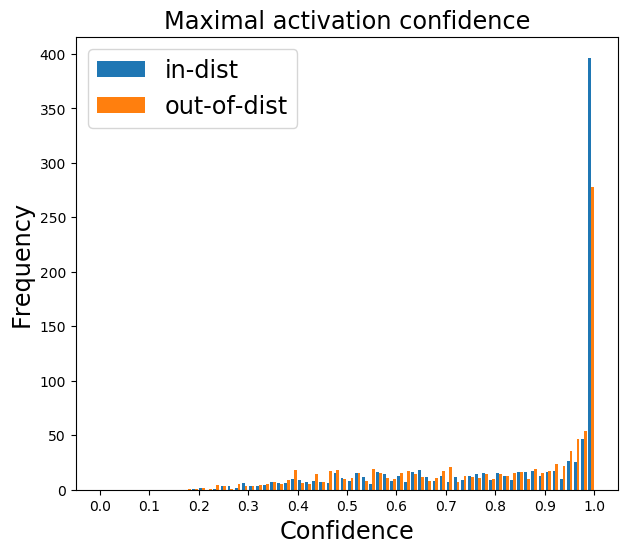

In [71]:
plt.figure(figsize=(7, 6), dpi=100) #, dpi=100
plt.title("Maximal activation confidence", fontsize='xx-large')
# plt.ylim(top=3000)
plt.hist([confidence, confidence_ood], bins=bin_dividers, label=['in-dist', 'out-of-dist'])
plt.xticks(np.linspace(0.0, 1.0, num=11))
plt.legend(fontsize='xx-large')
plt.ylabel("Frequency", fontsize='xx-large')
plt.xlabel("Confidence", fontsize='xx-large')
# plt.savefig("fig1.png")
plt.show()

0.5724625000000001


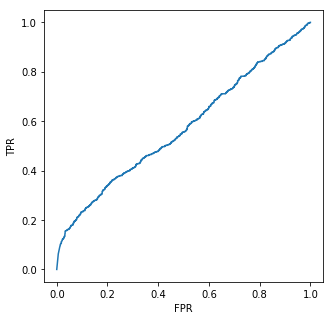

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_true = np.concatenate( ( np.ones(len(confidence)), np.zeros(len(confidence_ood)) ) )
y_score = np.concatenate((confidence, confidence_ood))
fpr, tpr, thresholds = roc_curve(y_true, y_score)
auc_metric = auc(fpr, tpr)

print(auc_metric)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## Using negative entropy as a confidence measure

In [73]:
from scipy.stats import entropy

neg_entropies = -np.apply_along_axis(entropy, 1, preds)
neg_entropies_ood = -np.apply_along_axis(entropy, 1, preds_ood)
print(neg_entropies.shape)

(1000,)


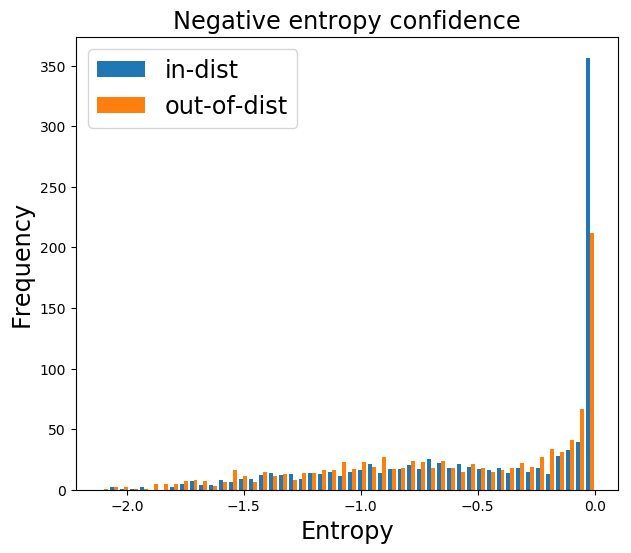

In [74]:
plt.figure(figsize=(7, 6), dpi=100)
plt.title("Negative entropy confidence", fontsize='xx-large')
plt.hist([neg_entropies, neg_entropies_ood], bins=50, label=['in-dist', 'out-of-dist'])
plt.legend(fontsize='xx-large')
plt.ylabel("Frequency", fontsize='xx-large')
plt.xlabel("Entropy", fontsize='xx-large')
# plt.tight_layout()
# plt.savefig("baselines/baseline_neg_ent_50.png")
plt.show()

0.576934


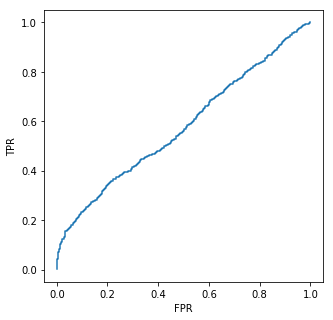

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_true = np.concatenate( ( np.ones(len(neg_entropies)), np.zeros(len(neg_entropies_ood)) ) )
y_score = np.concatenate((neg_entropies, neg_entropies_ood))
fpr, tpr, thresholds = roc_curve(y_true, y_score)
auc_metric = auc(fpr, tpr)

print(auc_metric)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
# plt.savefig("baselines/roc_neg_ent.png")
plt.show()

## histogram intersection

In [76]:
def return_intersection(hist_1, hist_2):
    minima = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
    return intersection

In [77]:
hist1,bins=np.histogram(confidence)
hist2,bins=np.histogram(confidence_ood)

hist3,bins=np.histogram(neg_entropies)
hist4,bins=np.histogram(neg_entropies_ood)

print("maximal activation int:", return_intersection(hist1, hist2))
print("neg entropy int:", return_intersection(hist3, hist4))

maximal activation int: 0.938
neg entropy int: 0.911


In [78]:
from scipy import stats

print(stats.ttest_ind(confidence,confidence_ood))
print(stats.ttest_ind(neg_entropies,neg_entropies_ood))

Ttest_indResult(statistic=3.1795532028559363, pvalue=0.001497616275838641)
Ttest_indResult(statistic=4.103185657364766, pvalue=4.2386793742736764e-05)
